In [1]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
def efrone(X,x):
	result=0
	for i in range(len(X)):
		if X[i]<=x:
			result+=1
	return result/len(X)

1. Построить частичные суммы в представлении Винера (в виде тригонометрических сумм) для броуновского движения. Проверить, что полученный процесс имеет независимые нормальные приращения – измерить значения процесса в моменты i/n, найти приращения, построить ЭФР и проверить ее на нормальность.

In [3]:
def sum(Z,x):
	if 0<=x<=1:
		phis=np.array([2**0.5*np.sin(np.pi*(k-0.5)*x)/(k-0.5)/np.pi for k in range(1,len(Z)+1)])
		return np.sum(Z*phis)
	else:
		return 1000

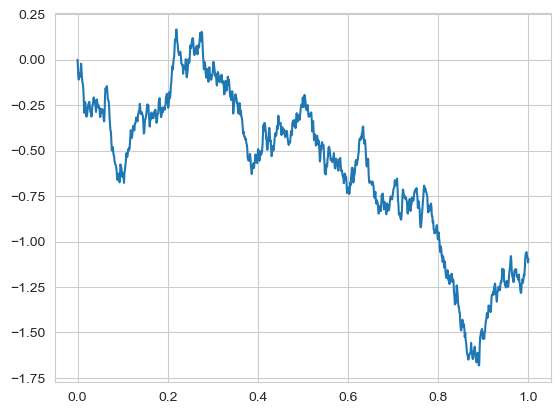

In [4]:
k=1000 #число слагаемых
n=100
Z=st.norm.rvs(size=k)
x=np.linspace(0,1,1000)
process=[sum(Z,i) for i in x]
plt.plot(x,process)

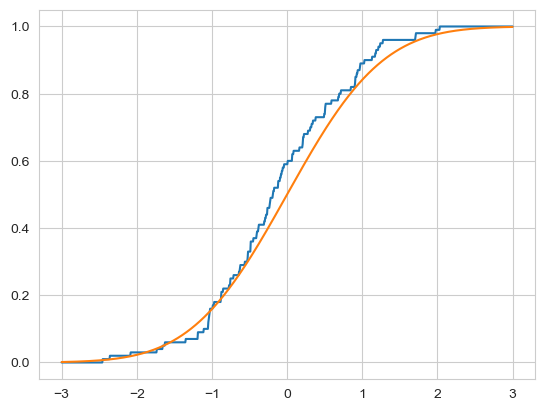

In [5]:
differences = []
for i in range(1,n+1):
	differences.append(process[i*int(round((1000/n)))-1] - process[(i-1)*int(round((1000/n)))])
#differences ~ N(0,1/n) => differences*n**0.5 ~ N(0,1)
differences=np.sort(np.array(differences))*n**0.5
t=np.linspace(-3,3,1000)
plt.plot(t,[efrone(differences,i) for i in t])
plt.plot(t,st.norm.cdf(t))

In [6]:
print(st.kstest(differences,st.norm.cdf))

KstestResult(statistic=0.10755036567184456, pvalue=0.18384122425620186, statistic_location=-0.04400644226854766, statistic_sign=1)


2. Построить траекторию броуновского движения, броуновского моста используя то, что фрагмент броуновского движения от 0 до последнего нуля τ0 совпадает по распределению (после
растяжения) с броуновским мостом.

0.9438510190218209


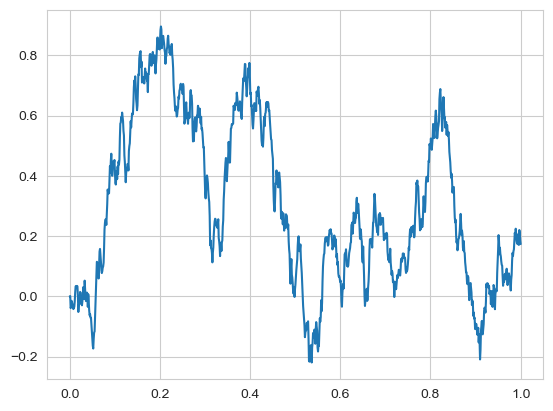

In [7]:
ind=1
while ind==1:
	k=1000 #число слагаемых
	Z=st.norm.rvs(size=k)
	x=np.linspace(0,1,1000)
	for i in range(999):
		if sum(Z,x[999-i])*sum(Z,x[999-i-1])<0:
			root=opt.bisect(lambda x: sum(Z,x),x[999-i-1],x[999-i])
			ind=0
			break
	print(root)
	process=[sum(Z,i) for i in x]
	plt.plot(x,process)

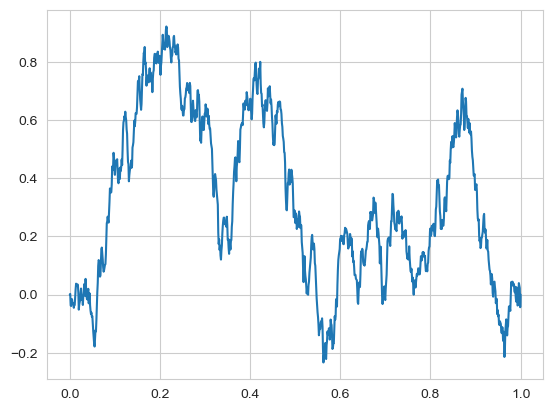

In [8]:
#раньше промежутки были t, теперь они t/root => W0t-W0s ~ N(0,(t-s)*root)=>(W0t-W0s)/root**0.5~N(0,t-s)
x=np.linspace(0,1,1000)
bridge=np.array([sum(Z,i*root) for i in x])/root**0.5
plt.plot(x,bridge)

3. Исследовать закон арксинуса для последнего пересечения нуля для случайного блуждания с шагами а) N (0, 1), б) (1) − 1, в) X = δε, P(δ = 1) = P(δ = −1) = 1/2, P(ε > x) = 1/x7/6, x ≥ 1, где δ, ε предполагаются независимыми.

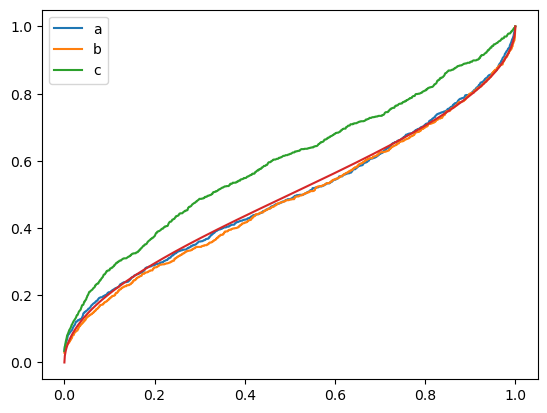

In [3]:
n=1000
last_moment_a=np.zeros(1000)
last_moment_b=np.zeros(1000)
last_moment_c=np.zeros(1000)
for i in range(1000):
	X_a=st.norm.rvs(size=n,loc=0,scale=1)
	X_b=2*(np.random.binomial(size=n,p=0.5,n=1)-0.5)
	y=st.uniform.rvs(size=n,loc=0,scale=1)
	x=[1/(1-j)**(6/7) for j in y]
	X_c=2*(np.random.binomial(n=1,size=n,p=0.5)-0.5)*x
	for j in range(1,n):
		X_a[j]+=X_a[j-1]
		if X_a[j]*X_a[j-1]<=0:
			last_moment_a[i]=j
		X_b[j]+=X_b[j-1]
		if X_b[j]*X_b[j-1]<=0:
			last_moment_b[i]=j
		X_c[j]+=X_c[j-1]
		if X_c[j]*X_c[j-1]<=0:
			last_moment_c[i]=j
last_moment_a=np.array(last_moment_a)/n
last_moment_b=np.array(last_moment_b)/n
last_moment_c=np.array(last_moment_c)/n
x=np.linspace(0,1,1000)
plt.plot(x,[efrone(last_moment_a,i) for i in x], label = 'a')
plt.plot(x,[efrone(last_moment_b,i) for i in x], label = 'b')
plt.plot(x,[efrone(last_moment_c,i) for i in x], label = 'c')
plt.legend()
plt.plot(x,2/np.pi*np.arcsin(x**0.5))